In [2]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_4/'

In [3]:
d = np.load(f'{source_path}/inertia.npz')
Ks = d['Ks']
inertias = d['inertias']#,Ks=Ks,inertias=inertias)

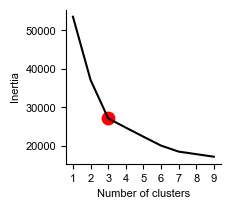

In [4]:
fig,ax = plt.subplots(figsize=(2,2))
ax.plot(Ks,inertias,color='k')
ax.set(xlabel='Number of clusters',ylabel='Inertia',xticks=Ks)
ax.scatter(Ks[2],inertias[2],marker='o',color='r',s=80)
np.savetxt(f'./statistical_source/ED4/inertia_panela.txt', inertias)

#plt.savefig('../Supp/clustering/inertia.jpg',dpi=300,bbox_inches='tight')

In [5]:
d = np.load(f'{source_path}/kmeans_clus.npz',allow_pickle=True)
all_clusters = d['all_clusters']
t_ar = d['t_ar']

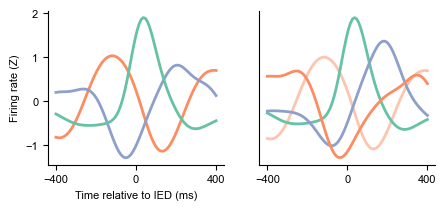

In [6]:
comp_palette_og=np.array(sns.color_palette('Set2').as_hex())
fig,axs = plt.subplots(1,2,figsize=(5,2))
for ii,clusters_ in enumerate(all_clusters):
    ax = axs[ii]
    alphas = [1,1,1,1]
    if(ii == 0):
        comp_palette = comp_palette_og[[1,2,0]]
    if(ii == 1): 
        comp_palette = comp_palette_og[[1,0,2,1]]
        alphas = [0.5,1,1,1]
    for i,c in enumerate(clusters_):
        ax.plot(t_ar,c,color=comp_palette[i],linewidth=2,alpha=alphas[i])
    
    if(ii == 1):
        ax.set(xticks=[-400,0,400],yticks=[])
    else:
        ax.set(xticks=[-400,0,400],ylabel='Firing rate (Z)',xlabel='Time relative to IED (ms)')
np.savetxt(f'./statistical_source/ED4/clus3_panelb.txt',
          all_clusters[0])
np.savetxt(f'./statistical_source/ED4/clus4_panelb.txt',
          all_clusters[0])
#plt.savefig('../Supp/clustering/3_4_clus.jpg',dpi=300,bbox_inches='tight')

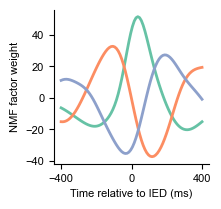

In [7]:
from scipy.io import loadmat
B = loadmat(f'{source_path}/nmf_clus_weights.mat')['B']
fig,ax = plt.subplots(figsize=(2,2))
t_ar = np.linspace(-400,400,B.shape[0])
for i,b in enumerate(B.T):
    ax.plot(t_ar,b,color=sns.color_palette('Set2')[i],linewidth=2)

ax.set(xticks=[-400,0,400],ylabel='NMF factor weight',xlabel='Time relative to IED (ms)')
np.savetxt(f'./statistical_source/ED4/clusnmf_panelc.txt',
          B)